In [3]:
### Display DataFrame Summary Information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
### Data Import and Library Setup
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
### Display DataFrame Summary Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Show descriptive statistics for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Show number of missing entries per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

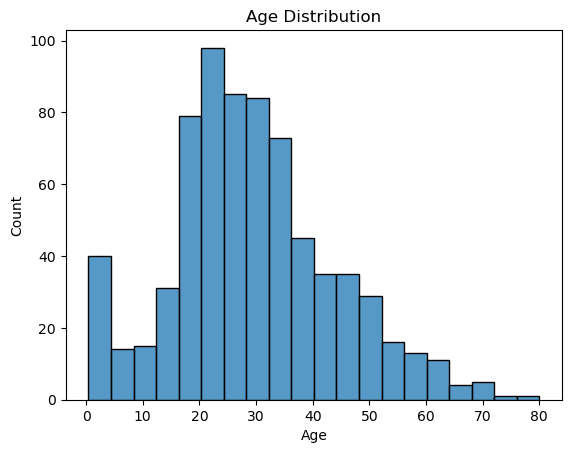

In [8]:
# Plot a histogram showing how passenger ages are distributed
sns.histplot(df['Age'].dropna())
plt.title('Age Distribution')
plt.show()

In [47]:
# Replace missing Age values with the mean age to handle missing data
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [46]:
# Count how many missing values remain in the Age column after filling
df['Age'].isnull().sum()

np.int64(0)

In [13]:
# Display the first 5 records to get a quick overview of the dataset structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


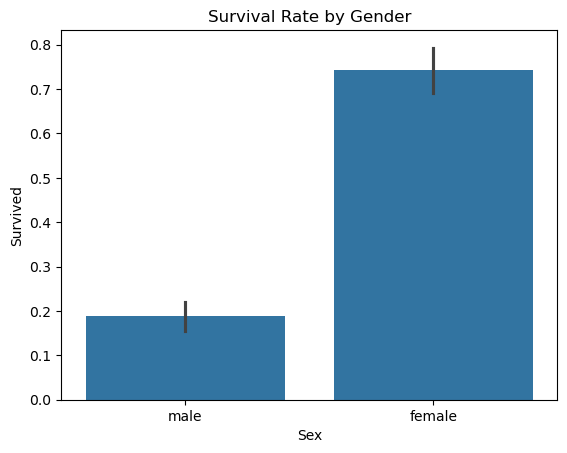

In [34]:
# Visualize how survival rates differ between males and females
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

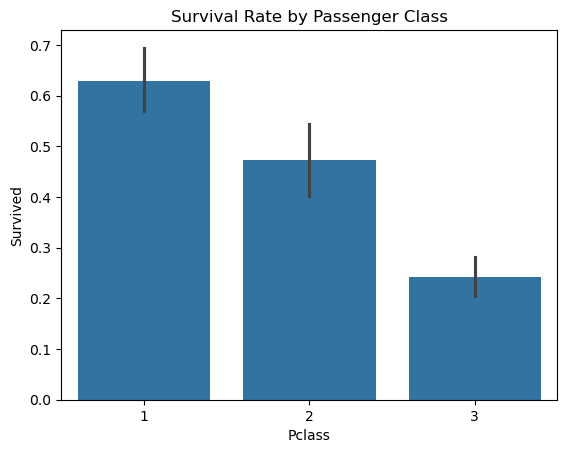

In [33]:
# Visualize survival rates across different passenger classes
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [27]:
# Show number of missing entries per column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
# Show the list of all column headers in the dataset
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [30]:
# Replace missing values in Embarked column with its mode 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

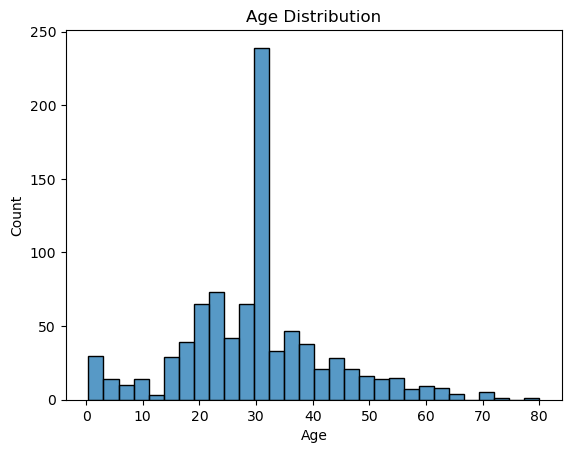

In [31]:
# Plot the distribution of passenger ages, now including previously missing values filled with the mean
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

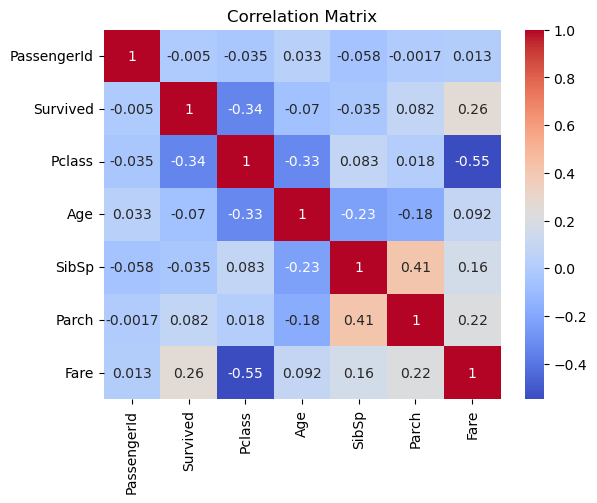

In [32]:
# Show correlation heatmap to understand relationships between numeric variables
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

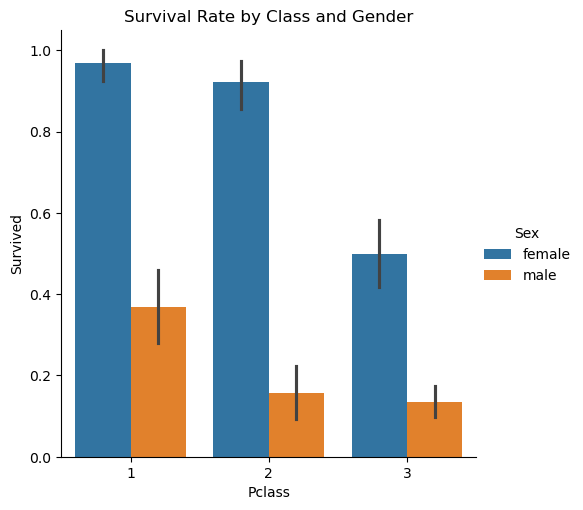

In [35]:
# Visualize how survival rates vary across passenger classes, split by gender
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()

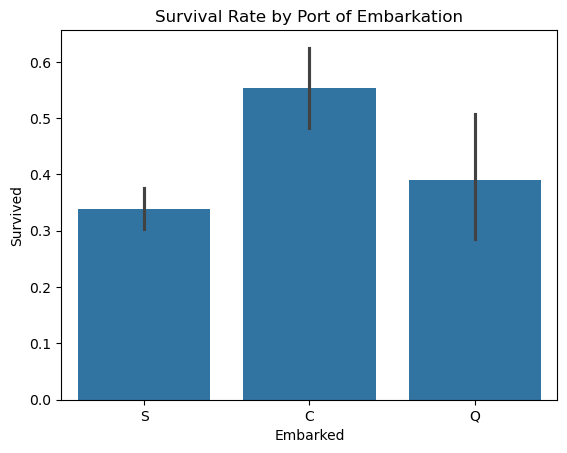

In [36]:
# Visualize survival rates based on the port where passengers boarded
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

In [37]:
# Calculate Average Survival Rate by Gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [38]:
# Calculate Average Survival Rate by Passenger Class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

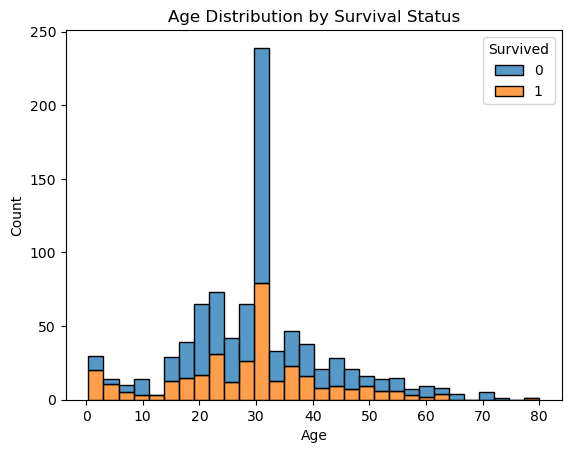

In [39]:
# Visualize how age distributions differ between survivors and non-survivors
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.show()

# Key Insights
- Females had a higher survival rate than males.
- Passengers in 1st class had a better chance of survival than those in 2nd or 3rd class.
- Most age values are present, and missing values were filled with the mean.
- The Cabin column had too many missing values and was removed.
- Most passengers boarded at port 'S', but survival rate was highest for port 'C'.


In [40]:
# Calculate family size by adding number of siblings/spouses, parents/children, and the passenger themselves; then show sample data
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [41]:
# Convert 'Sex' and 'Embarked' into dummy variables for machine learning
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           2      True       False        True  
1          PC 17599  71.2833           2     False       False       False  
2  STON/O2. 3101282   7.9250           1     False       False        True  
3            11380

In [42]:
# Export the cleaned and encoded dataset to a CSV file for future use or sharing
df_encoded.to_csv('titanic_cleaned.csv', index=False)

In [49]:
# Split data into train and test sets, train logistic regression, and print accuracy scores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_encoded.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
print("Training accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Training accuracy: 0.8047752808988764
Test accuracy: 0.8044692737430168


C:\Users\pranay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.
Increase the number of iterations (max_iter) or scale the data as shown in:
...

In [52]:
# Evaluate model performance with confusion matrix and detailed classification metrics
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

